In [61]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [63]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [64]:
boston_df=pd.read_csv(boston_url)

In [65]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


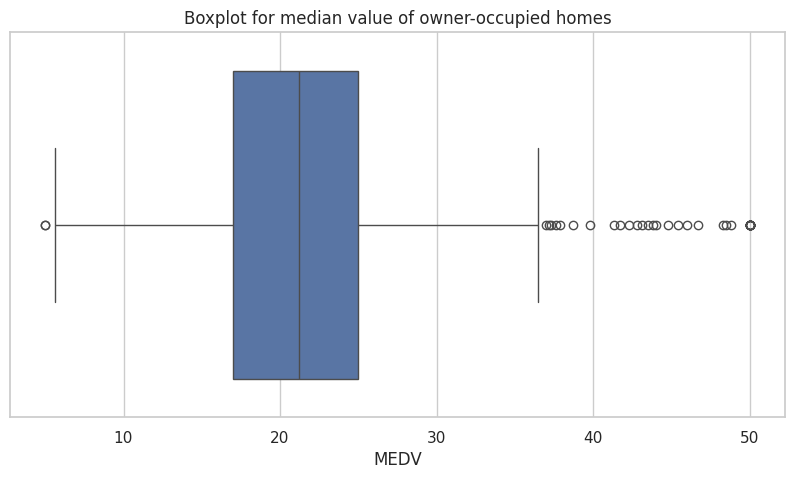

In [66]:
#Create a boxplot for MEDV
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV)
plt.title("Boxplot for median value of owner-occupied homes")
plt.show()

**Observations:** Several outliers on the upper end, after the third quartile.

<ipython-input-67-d2602667a7db>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=boston_df.CHAS,bins=10, kde=False)


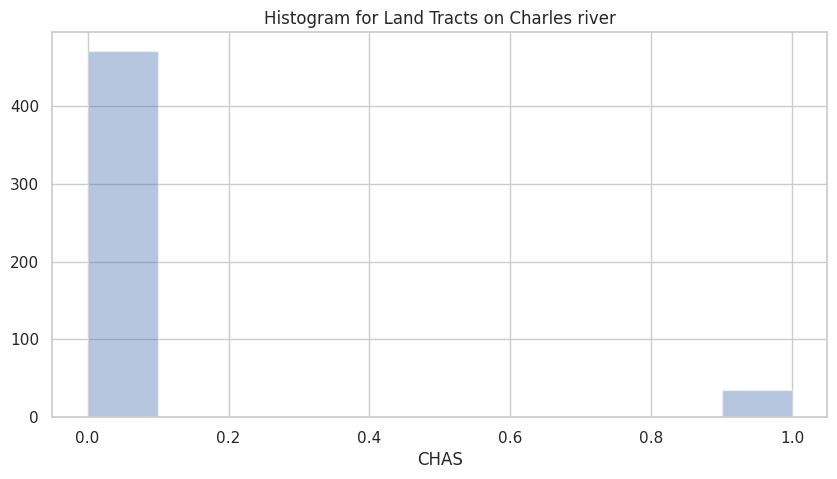

In [67]:
#Create a bar plot for homes on the Charles River
plt.figure(figsize=(10,5))
sns.distplot(a=boston_df.CHAS,bins=10, kde=False)
plt.title("Histogram for Land Tracts on Charles river")
plt.show()

**Observations:** The majority of homes do not bound the Charles River

Text(0.5, 1.0, 'Median House Prices by Age Group')

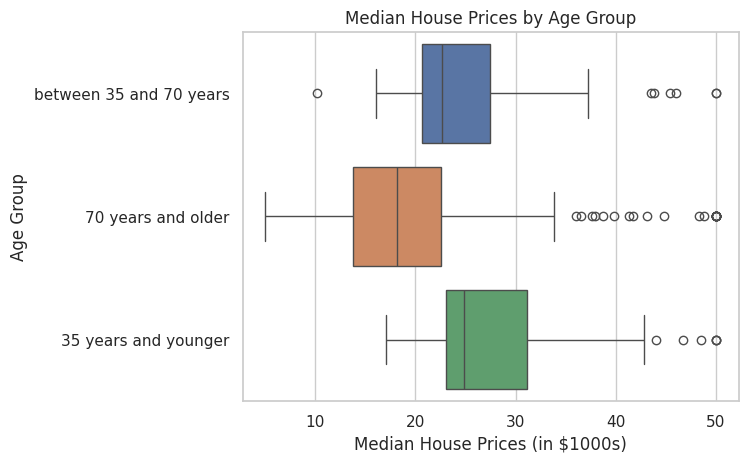

In [68]:
# Discretize the AGE variable into three groups
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

# Create a boxplot for MEDV vs AGE_GROUP (note the column name 'age_group')
ax = sns.boxplot(x='MEDV', y='age_group', hue='age_group', data=boston_df)

# Customize titles, axis, and labels
ax.set_xlabel("Median House Prices (in $1000s)")
ax.set_ylabel("Age Group")
ax.set_title("Median House Prices by Age Group")

 **Observations:** 35 years or younger  pays the highest median house price. Those over 70 have lowest median house prices.

In [69]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


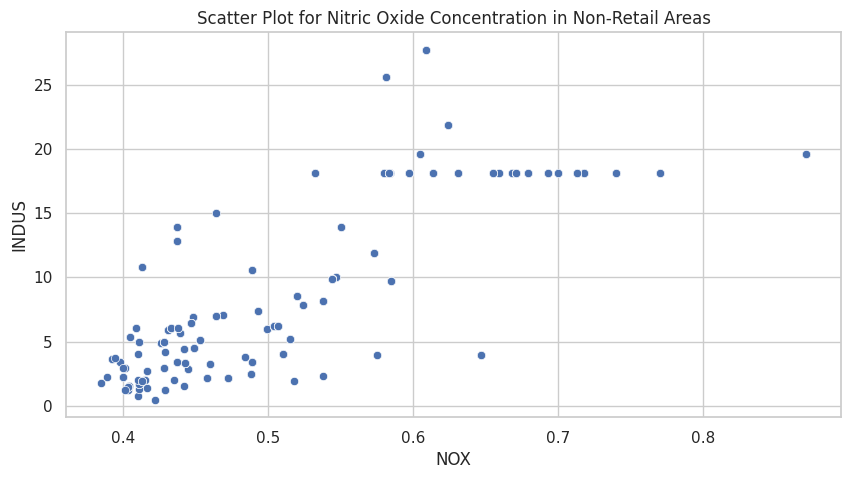

In [70]:
#Create a scatterplot for NOX v. INDUS
plt.figure(figsize=(10,5))
sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
plt.title("Scatter Plot for Nitric Oxide Concentration in Non-Retail Areas")
plt.show()

**Observations:** The graph suggests a weak link between the two variables, with data points widely dispersed and areas with similar proportions of non-retail businesses having vastly different NO concentrations.The proportion of non-retail business acres by itself may not be a strong predictor of nitric oxide concentration levels though the relationship appears linear at times.  

<ipython-input-71-89807f4559e7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=boston_df.PTRATIO,bins=10, kde=False)


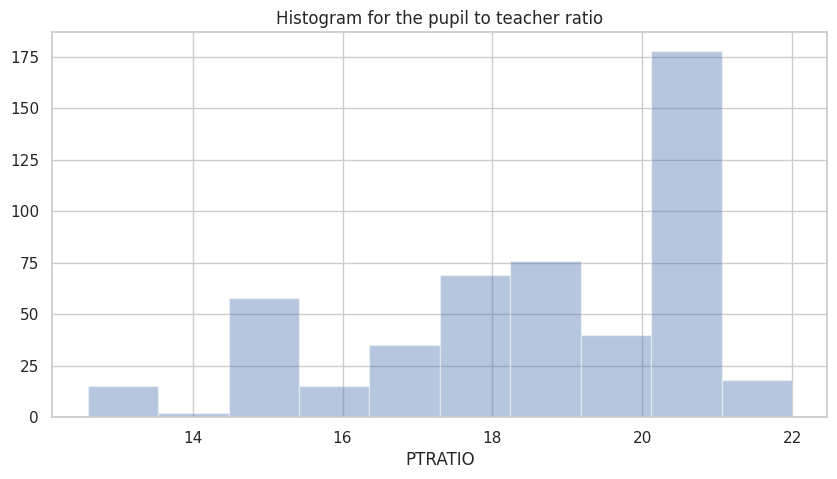

In [71]:
#Create histogram for pupil-teacher ratio
plt.figure(figsize=(10,5))
sns.distplot(a=boston_df.PTRATIO,bins=10, kde=False)
plt.title("Histogram for the pupil to teacher ratio")
plt.show()

**Observations:** the ratio is highest around 21 and lowest around 14

<h1>TTest: Charles River v. MEDV</h1>

**Hypotheses**<p>
H0 - There is no difference in house values for houses bonded by the Charles River <p>
H1 - There is a difference in house values for houses bonded by the Charles River

In [72]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [73]:
#Run the Levene test to check test significance
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [74]:
#Since previous pvalue was less than 0.05, run ttest assuming equal var is False
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusions:** Since the p-value is less than the typical alpha level of 0.05, we can reject the null hypothesis. This suggests that there is a statistically significant difference in the median house values between houses on the Charles River and those that are not.

<h1>ANOVA: AGE v. MEDV</h1>

**Hypotheses**

H0 - There is no difference in house values for houses built prior to 1940

H1 - There is a difference in house values for houses built prior to 1940

In [75]:
#Run levene test to test for variances
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [76]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_over = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_over)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusions:** Given the extremely low p-value and the high f-statistic, we have strong evidence to reject the null hypothesis. Age group is associated with differences in median house values. Groups of different ages tend to have different median values. 

<h1>Pearson Correlation: NOX v. INDUS</h1>

**Hypotheses**

H0 - There is no correlation between nitric oxide concentrations and the proportion of non-business acres per town

H1 - There is a correlation between nitric oxide concentrations and the proportion of non-business acres per town

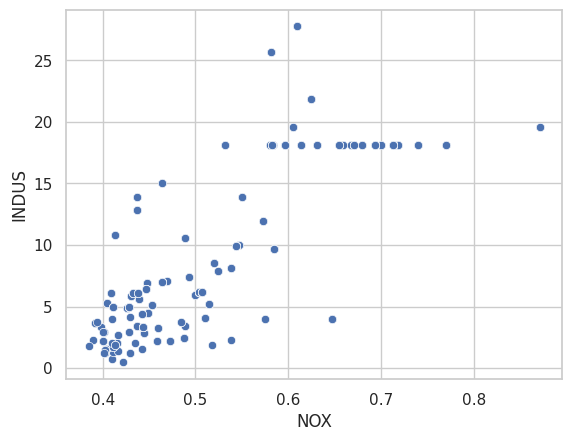

In [77]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [78]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusions:** Given the extremely low p-value, we can confidently reject the null hypothesis that there is no linear correlation between these two variables (INDUS and NOX). The correlation coefficient of 0.76 suggests a strong positive correlation, in other words, as the number of non retail businesses increases in a given area, so does the concentration of nitric oxide. 

<h1>Regression: Employment Centers v. MEDV</h1>

**Hypotheses**

H0 - Weighted distance  to the five Boston employment centres has no effect on median house value

H0 - Weighted distance  to the five Boston employment centres has an effect on median house value


In [79]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        08:50:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusions:** Given the low pvalue, we reject the null hypothesis as there is evidence that there is a difference in median house value based on distance to employment centers. The coeffienct indicates that for each additional unit increase in 'DIS', there's an average increase of 1.0916 in 'MEDV'. The p-value for 'DIS' is extremely low, indicating that this is a statistically significant predictor.